In [8]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import pandas as pd
import seaborn as sns
import utils

In [9]:
df = utils.read_toy_data()

In [12]:
z = np.array([1,1]).reshape(2,1)
df['proj'] = project_along_vector(df[['x', 'y']].T, z).T

Text(0.5, 1.0, 'Histogram over the projection vector')

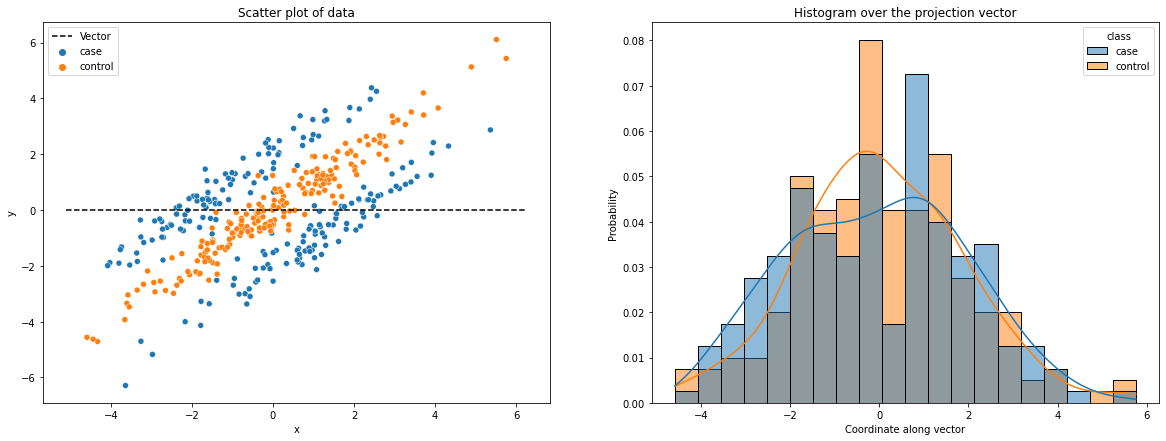

In [21]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(20,7)
sns.scatterplot(data = df, x = 'x', y = 'y', hue= 'class', ax = axs[0])
plot_line(z, np.array([0,0]), axs[0],plot_kwargs={'linestyle':'dashed', 'color': 'black', 'label': 'Vector'})
axs[0].legend()
axs[0].set_title('Scatter plot of data')

sns.histplot(data = df, x = 'proj', hue = 'class', ax= axs[1], stat = 'probability', bins = 20, kde= True)
axs[1].set_xlabel('Coordinate along vector')
axs[1].set_title('Histogram over the projection vector')


In [22]:

temp_file = "temp.png"
with imageio.get_writer('../media/rotating_projection.gif', mode='I') as writer:

    for angle in np.linspace(0,2*np.pi, 180):
        z = angle_2_vec(angle)
        df['proj'] = project_along_vector(df[['x', 'y']].T, z).T
        fig, axs = plt.subplots(1,2)
        sns.scatterplot(data = df, x = 'x', y = 'y', hue= 'class', ax = axs[0])
        plot_line(z, np.array([0,0]), axs[0],plot_kwargs={'linestyle':'dashed', 'color': 'black', 'label': 'Vector'})
        axs[0].legend()
        axs[0].set_title('Scatter plot of data')

        sns.histplot(data = df, x = 'proj', hue = 'class', ax= axs[1], stat = 'probability', bins = 20, kde= True)
        axs[1].set_xlabel('Coordinate along vector')
        axs[1].set_title('Histogram over the projection vector')

        fig.set_size_inches(18,9)
        axs[0].set_xlim([-7,7])
        axs[0].set_ylim([-7,7])
        axs[0].set_title("Original data points")
        axs[1].set_xlim([-6,6])
        axs[1].set_ylim([0,0.15])
        axs[1].set_title(f"Projection onto line with angle {int(angle/(2*np.pi)*360)}")
        fig.savefig(temp_file)
        writer.append_data( imageio.imread(temp_file))
        plt.close(fig)

import os
os.remove(temp_file)

C:\Users\joelw\AppData\Local\Temp/ipykernel_22448/3791916129.py:29: RuntimeWarning: divide by zero encountered in true_divide
  lambdas = (lim_vec-start_vec)/dir_vec
